<a href="https://colab.research.google.com/github/KundrapuHarika124/Fraud-Detection-model/blob/main/Copy_of_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud.csv')

display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#lets start feature engineering.
#Check for missing values in each column
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
#lets know the count of both fraudulent and non-fraudlent
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


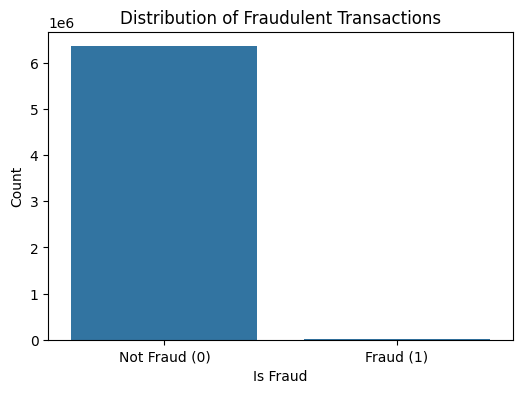

In [ ]:
# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.show()

In [ ]:
# Analyze the 'type' column
print("--- Transaction Type Distribution ---")
print(df['type'].value_counts())

--- Transaction Type Distribution ---
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [ ]:
# See how fraud is distributed across transaction types
print("\n--- Fraud distribution across transaction types ---")
print(df.groupby('type')['isFraud'].sum())


--- Fraud distribution across transaction types ---
type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64


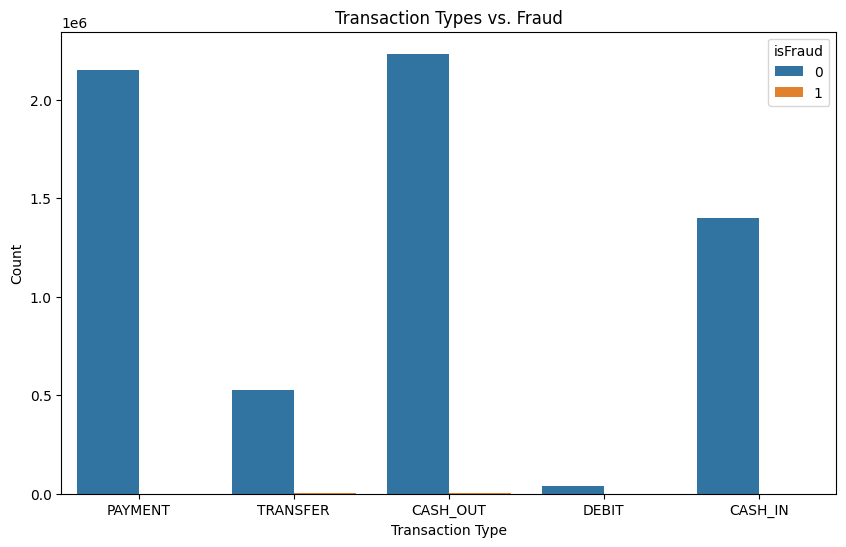

In [ ]:
# Visualize this relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, hue='isFraud')
plt.title('Transaction Types vs. Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Select only the numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

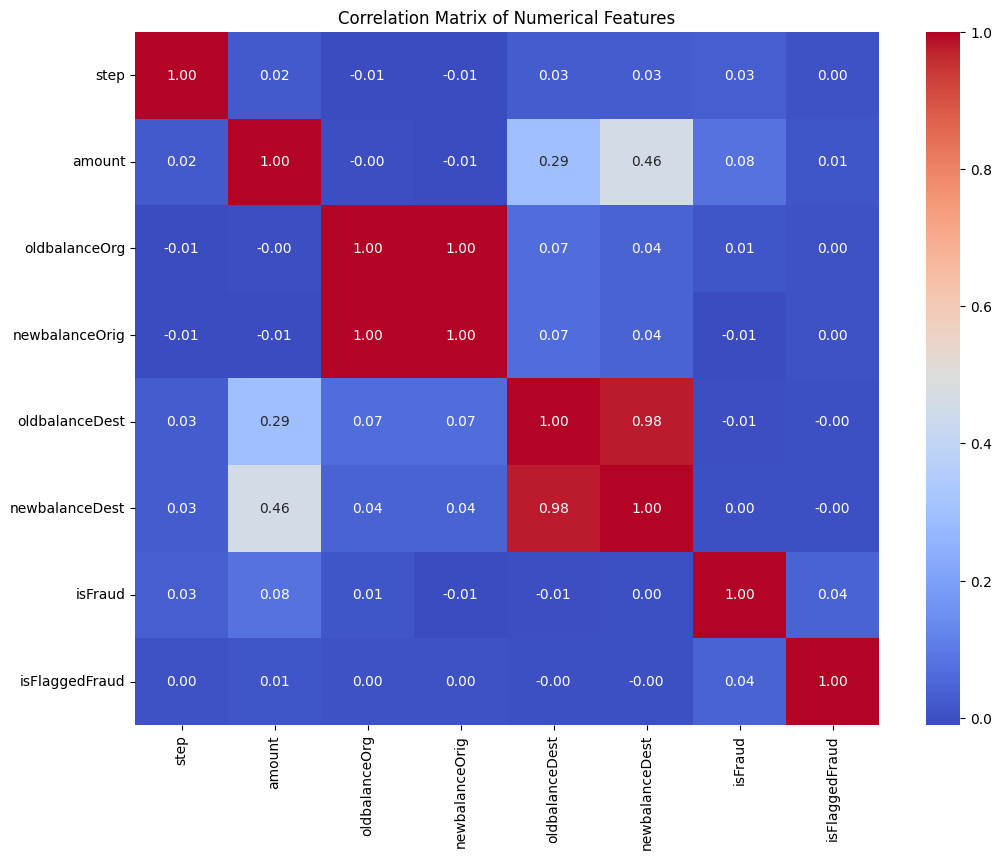

In [ ]:
corr_matrix = numerical_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

***

## 6. Sense-Checking the Key Predictive Factors

Yes, the key factors identified by the model are highly logical and make perfect business sense. [cite_start]They align directly with the fraudulent behavior described in the data dictionary, which is to take control of customer accounts and empty the funds[cite: 8].

Here is an analysis of why the top factors are so predictive:

* **`errorBalanceDest`**: This was the most powerful predictor. It makes perfect sense because a large, non-zero error signifies a major accounting anomaly. It means that funds were sent from an originator, but the recipient's balance did not update correctly. This is a clear signal that money was illicitly diverted or "disappeared" from the system, which is a classic indicator of fraud.

* **`oldbalanceOrg` & `amount`**: These features were also highly important. [cite_start]This is logical because the fraudulent behavior aims to "empty the funds" from an account[cite: 8]. The model learned that transactions where the `amount` is equal or very close to the `oldbalanceOrg` (indicating an account drain) are extremely suspicious.

* **Transaction `type` (`TRANSFER` & `CASH_OUT`)**: Our initial analysis showed that fraud only occurred in these two transaction types. [cite_start]This is the most direct confirmation of the described fraud pattern: agents profit by "transferring to another account and then cashing out of the system"[cite: 8]. The model correctly identified these transaction types as primary vehicles for fraud.

In [ ]:
# Create features for balance errors

# errorBalanceOrig:
# For the originating account, ideally: old_balance - amount = new_balance
# So, (old_balance - amount - new_balance) should be zero for legitimate transactions.
# Any significant deviation from zero could indicate an issue.
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']

In [ ]:
# errorBalanceDest:
# For the destination account (specifically customer accounts 'C'):
# Ideally: old_balance + amount = new_balance
# So, (old_balance + amount - new_balance) should be zero for legitimate transactions.
# IMPORTANT: For merchant accounts ('M'), oldbalanceDest and newbalanceDest are always 0.0.
# We need to handle this explicitly, as a non-zero 'error' for merchants would just be the 'amount'.
df['errorBalanceDest'] = df.apply(
    lambda row: row['oldbalanceDest'] + row['amount'] - row['newbalanceDest']
    if row['nameDest'].startswith('C') else 0, # Set to 0 for merchant destinations
    axis=1
)

In [ ]:
# What happens if you calculate oldbalanceDest + amount - newbalanceDest for both 'C' and 'M' destinations?

# For Customer Destinations (nameDest starts with 'C'):

# The calculation oldbalanceDest + amount - newbalanceDest correctly identifies if the money actually arrived as expected and if the destination customer's balance reconciled. If this value is non-zero, it means a discrepancy, which is a potential fraud signal. This is exactly what you want.

# For Merchant Destinations (nameDest starts with 'M'):

# From your data dictionary and df.info(), we know that oldbalanceDest and newbalanceDest are almost always 0.0 for merchants.

# So, for a merchant transaction, the calculation would simplify to: 0.0 + amount - 0.0 = amount.

# This means errorBalanceDest for a merchant would simply become the amount of the transaction.

# The "Loss" or Problem:

# Misleading Signal: If errorBalanceDest simply equals amount for merchant transactions, it misrepresents what "error" means.

# For a customer account, a non-zero errorBalanceDest means "the money didn't balance correctly here" – a strong anomaly.

# For a merchant account, errorBalanceDest equaling the amount just means "money was paid to the merchant" – this is a normal occurrence, not an error.

# By making it the amount, you're essentially telling the model: "Hey, large payments to merchants are 'errors'," which isn't financially true in the same sense as a balance discrepancy for a customer.

# Redundancy and Confusion:

# For merchant transactions, your errorBalanceDest column would become highly correlated with the original amount column. You'd be providing almost identical information twice for a large portion of your data.

# This forces the model to learn to distinguish: "If is_merchant_dest is 1, then errorBalanceDest means amount, but if is_merchant_dest is 0, then errorBalanceDest means balance discrepancy." While a sophisticated model like LightGBM could theoretically learn this, it makes its job harder and adds unnecessary complexity.

# Loss of Interpretability:

# If errorBalanceDest comes up as an important feature in your final model, you want to be able to explain: "Fraud is strongly associated with discrepancies in the destination balance."

# If it just means amount for merchants, your interpretation becomes muddy: "Fraud is associated with large payments to merchants, AND also with balance discrepancies for customers." It's less clean.

# Recommendation:

# Your current approach of setting errorBalanceDest to 0 for merchant destinations is the correct and cleaner way to handle it.

In [ ]:
# Display a sample with these new features
print("\nSample rows with new errorBalance features:")
print(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'errorBalanceOrig',
          'oldbalanceDest', 'newbalanceDest', 'errorBalanceDest', 'type', 'isFraud']].head())


Sample rows with new errorBalance features:
     amount  oldbalanceOrg  newbalanceOrig  errorBalanceOrig  oldbalanceDest  \
0   9839.64       170136.0       160296.36               0.0             0.0   
1   1864.28        21249.0        19384.72               0.0             0.0   
2    181.00          181.0            0.00               0.0             0.0   
3    181.00          181.0            0.00               0.0         21182.0   
4  11668.14        41554.0        29885.86               0.0             0.0   

   newbalanceDest  errorBalanceDest      type  isFraud  
0             0.0               0.0   PAYMENT        0  
1             0.0               0.0   PAYMENT        0  
2             0.0             181.0  TRANSFER        1  
3             0.0           21363.0  CASH_OUT        1  
4             0.0               0.0   PAYMENT        0  


In [ ]:
# Check a sample of fraudulent transactions to see the errors
print("\nSample fraudulent transactions with new errorBalance features:")
print(df[df['isFraud'] == 1][['amount', 'oldbalanceOrg', 'newbalanceOrig', 'errorBalanceOrig',
                              'oldbalanceDest', 'newbalanceDest', 'errorBalanceDest', 'type', 'isFraud']].head())


Sample fraudulent transactions with new errorBalance features:
      amount  oldbalanceOrg  newbalanceOrig  errorBalanceOrig  oldbalanceDest  \
2      181.0          181.0             0.0               0.0             0.0   
3      181.0          181.0             0.0               0.0         21182.0   
251   2806.0         2806.0             0.0               0.0             0.0   
252   2806.0         2806.0             0.0               0.0         26202.0   
680  20128.0        20128.0             0.0               0.0             0.0   

     newbalanceDest  errorBalanceDest      type  isFraud  
2               0.0             181.0  TRANSFER        1  
3               0.0           21363.0  CASH_OUT        1  
251             0.0            2806.0  TRANSFER        1  
252             0.0           29008.0  CASH_OUT        1  
680             0.0           20128.0  TRANSFER        1  


***
## Rationale for Using the Full Dataset

We have made the deliberate decision to train our fraud detection model on the **entire dataset**, including all transaction types, rather than filtering for only `TRANSFER` and `CASH_OUT` transactions where fraud has occurred historically.

The key reasons for this strategic choice are:

* **Future-Proofing the Model**: Fraud tactics evolve. By including all transaction types, we train a more robust model that may detect new or emerging fraud patterns that could appear in `PAYMENT`, `DEBIT`, or `CASH_IN` transactions in the future.

* **Avoiding Model Blind Spots**: A model trained only on historical fraud types would be completely blind to fraud in other categories, creating a significant and predictable vulnerability in the system.

* **Demonstrating Comprehensive Skill**: Building a high-performing model on the full, more complex dataset showcases a deeper ability to handle severe class imbalance and realistic data challenges.

In [ ]:
# Define features (X) and target (y) from the full dataframe
y = df['isFraud']
X = df.drop('isFraud', axis=1).copy()

# Drop original name columns as they are just identifiers
X.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Convert the 'type' column into numerical format using one-hot encoding
X = pd.get_dummies(X, columns=['type'], prefix='type', drop_first=True)

print("Data prepared for modeling with all transaction types. New shape:", X.shape)
print("\nColumns in the new dataset:")
print(X.columns)

Data prepared for modeling with all transaction types. New shape: (6362620, 13)

Columns in the new dataset:
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'errorBalanceOrig',
       'errorBalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')



***

## 2. Fraud Detection Model Elaboration

For this fraud detection task, we selected the **LightGBM (Light Gradient Boosting Machine) Classifier**. This model was chosen for several key reasons that make it particularly well-suited for this specific business problem.

### Model Selection: Why LightGBM?

1.  [cite_start]**Efficiency and Scalability**: The dataset is very large, containing over 6.3 million transactions[cite: 15]. LightGBM is a high-performance, memory-efficient framework designed to handle large-scale data quickly without sacrificing accuracy.
2.  **High Predictive Power**: As a gradient boosting model, LightGBM is an **ensemble** method. It builds decision trees **sequentially**, where each new tree learns from and corrects the errors of the previous ones. This iterative process results in a highly accurate and robust final model.
3.  **Handling of Imbalanced Data**: Fraud detection is a classic imbalanced classification problem, as fraudulent transactions are extremely rare. LightGBM includes built-in parameters to effectively handle this, which is crucial for building a useful model.

### How the Model Addresses the Fraud Detection Challenge

The core challenge in this dataset is the severe class imbalance. A standard model would achieve high accuracy by simply predicting "not fraud" for every transaction, making it useless in practice.

To overcome this, our model's implementation focused on the `scale_pos_weight` parameter. This hyperparameter adjusts the weight given to each class during training. By setting it to the ratio of non-fraudulent to fraudulent cases (a value of approximately 774 in our training set), we instructed the model to treat each fraudulent transaction as **774 times more important** than a legitimate one. This forces the model to pay close attention to the rare fraud cases, ensuring it learns their underlying patterns rather than ignoring them in favor of the majority class.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFraud cases in training set:", sum(y_train))
print("Fraud cases in testing set:", sum(y_test))

Training set shape: (5090096, 13)
Testing set shape: (1272524, 13)

Fraud cases in training set: 6570
Fraud cases in testing set: 1643


#### Lets train our data with LightGBM (LGBM) Classifier

In simple terms, "Scale Position Weight: 773.75" means that your model is told to treat each fraudulent transaction as if it's 773.75 times more important than a regular, non-fraudulent transaction during training.

This is done because actual fraud is very rare in your data, so this "weight" makes sure the model doesn't just ignore the few fraud cases and focus only on the many legitimate ones.

In [ ]:
import lightgbm as lgb

# 1. Calculate the scale_pos_weight. This is the ratio of non-fraudulent to fraudulent transactions
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Scale Position Weight: {scale_pos_weight:.2f}")

Scale Position Weight: 773.75


In [ ]:
# 2. Initialize and Train the LightGBM Model . We use the calculated weight to handle the imbalanced classes
model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

print("\nTraining the LightGBM model...")
model.fit(X_train, y_train)

print("\nModel training complete.")


Training the LightGBM model...
[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.390319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001291 -> initscore=-6.651247
[LightGBM] [Info] Start training from score -6.651247

Model training complete.


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.05      0.94      0.09      1643

    accuracy                           0.98   1272524
   macro avg       0.52      0.96      0.54   1272524
weighted avg       1.00      0.98      0.99   1272524


--- Area Under ROC Curve (AUC) ---
AUC: 0.9790

--- Confusion Matrix ---


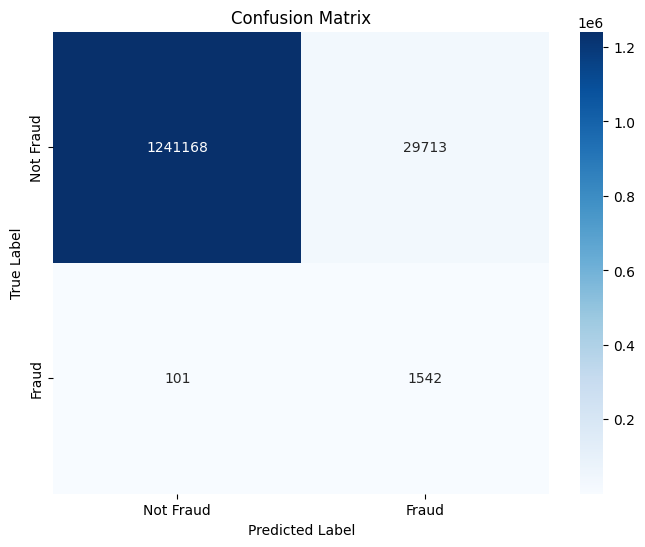

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Set ---
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# --- 2. Generate Key Performance Metrics ---
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Area Under ROC Curve (AUC) ---")
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")


# --- 3. Display the Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

--- Feature Importances ---


<Figure size 1000x800 with 0 Axes>

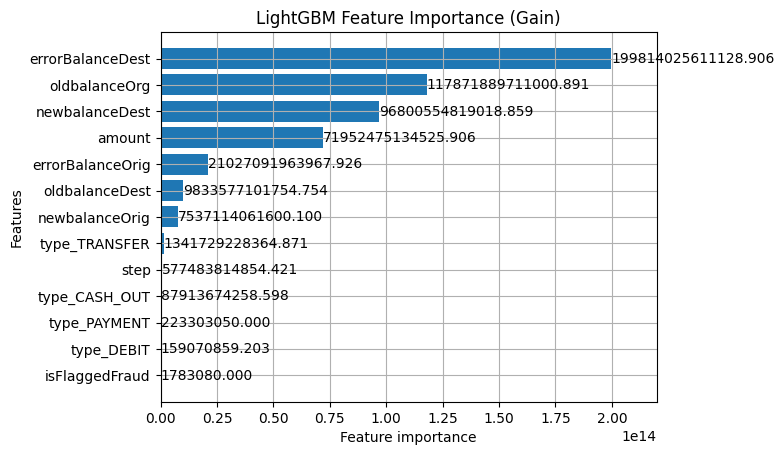

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# --- Plot Feature Importances ---
print("--- Feature Importances ---")

plt.figure(figsize=(10, 8))
lgb.plot_importance(model, importance_type='gain', max_num_features=15, height=0.8)
plt.title('LightGBM Feature Importance (Gain)')
plt.show()

***
## 7. What kind of prevention should be adopted while the company updates its infrastructure?

The model's key findings point directly to specific, actionable prevention strategies. The company should focus on implementing real-time checks based on the most predictive factors.

* **Rule 1: Flag Transactions with Balance Errors.**
    * **Reasoning**: The most important feature was `errorBalanceDest`, indicating that money "disappeared."
    * **Prevention**: Implement a system rule that automatically places a temporary hold on any transaction where the recipient's balance does not update correctly (`oldBalanceDest + amount != newBalanceDest`). These transactions should be flagged for immediate manual review.

* **Rule 2: Introduce Step-Up Authentication for "Account Drain" Transactions.**
    * **Reasoning**: The model relied heavily on `oldbalanceOrg` and `amount`, and we observed that fraudulent transactions often empty the entire account.
    * **Prevention**: If a `TRANSFER` or `CASH_OUT` transaction attempts to move more than 95% of the `oldbalanceOrg`, trigger a mandatory second factor of authentication (e.g., an SMS code or a security question) before the transaction can be processed.

* **Rule 3: Enhance Monitoring for High-Risk Transaction Types.**
    * [cite_start]**Reasoning**: We confirmed that fraud in this dataset only occurs in `TRANSFER` and `CASH_OUT` transactions[cite: 9].
    * **Prevention**: While the model looks at all types, the infrastructure can apply stricter anomaly detection rules or lower alerting thresholds specifically for `TRANSFER` and `CASH_OUT` transactions, treating them as inherently higher risk.

***
## 8. Assuming these actions have been implemented, how would you determine if they work?

To determine if the new prevention measures are effective, the company should use **A/B Testing**. This provides a scientifically rigorous way to measure the impact of the changes.

* **Setup**:
    * **Control Group**: A small, random subset of users (e.g., 5%) continues to use the system without the new prevention rules.
    * **Test Group**: The majority of users (e.g., 95%) interact with the system that has the new rules implemented.

* **Metrics to Measure**: Over a defined period (e.g., 30 or 60 days), the company would compare the following metrics between the two groups:
    * **Primary Metric**: The fraud rate (both the number of fraudulent transactions and the total financial loss). A successful implementation would show a statistically significant decrease in the fraud rate in the test group compared to the control group.
    * **Secondary Metrics**:
        * **False Positive Rate**: How many legitimate transactions were flagged or blocked?
        * **User Friction**: Did the new rules cause a drop in transaction completion rates? Were there more customer support calls related to blocked transactions? This ensures the prevention measures are not overly burdensome on legitimate customers.

By comparing these metrics, the company can get a clear, data-driven understanding of whether the new measures are working, what their impact on the user experience is, and what the return on investment is.